In [1]:
# Mawrer Amed Ramirez Martinez
# Avance de TOG IDI 4
# ms723737@iteso.mx
# mawrer@gmail.com

import numpy as np
np.random.seed(1)
import tensorflow
tensorflow.random.set_seed(2)

import pandas_bokeh
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

import pandas as pd 
import math as m
import os, glob

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
FEATURE_NAME = "Class"

In [5]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_145F.csv
1   3C-EURUSD_FULL_1D_21F.csv
2   3C-EURUSD_FULL_1D_45F.csv
3   3C-EURUSD_FULL_1D_70F.csv
4   3C-EURUSD_FULL_1H_145F.csv
5   3C-EURUSD_FULL_1H_45F.csv
6   3C-EURUSD_FULL_1H_70F.csv
7   5C-EURUSD_FULL_1D_21F.csv
8   5C-EURUSD_FULL_1D_45F.csv
9   C-EURUSD_FULL_1D_21F.csv
10   C-EURUSD_FULL_1H_25F.csv
11   C-EURUSD_FULL_1H_45F.csv
12   C-EURUSD_FULL_1H_54F.csv


In [8]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET = pd.read_csv(filenames[6], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET.head()


,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9,Class
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,1.0
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,0.0
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,-1.0
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,1.0
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,0.0


In [9]:
DATASET.shape

(102514, 70)

(102514, 70)


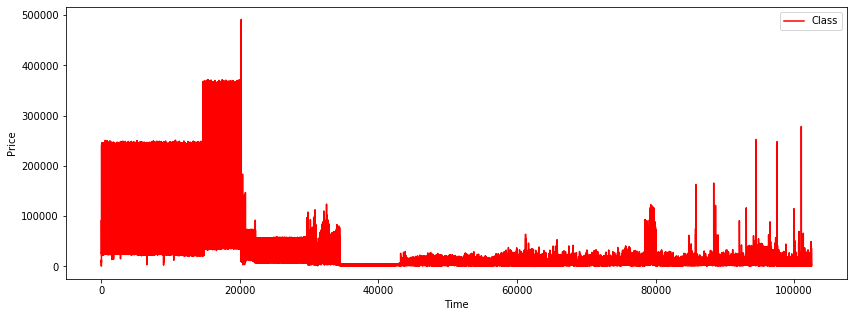

In [10]:
INICIO = 0
FIN = 102514
print(DATASET.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET['Volume'][INICIO:FIN], color = 'red', label = FEATURE_NAME)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
print(DATASET.shape)
DATASET1 = DATASET.iloc[45000:]
DATASET1.reset_index(drop=True, inplace=True)
print(DATASET1.shape)
print(DATASET1)

(102514, 70)
(57514, 70)
                 Gmt time     Open     High      Low    Close      Volume  \
0     2011-03-10 08:00:00  1.38304  1.38408  1.38101  1.38393  11933.9297   
1     2011-03-10 09:00:00  1.38395  1.38458  1.38324  1.38362   9550.0000   
2     2011-03-10 10:00:00  1.38364  1.38515  1.38321  1.38457   8586.9805   
3     2011-03-10 11:00:00  1.38458  1.38490  1.38218  1.38359   9865.1201   
4     2011-03-10 12:00:00  1.38357  1.38441  1.38179  1.38286  10214.8203   
...                   ...      ...      ...      ...      ...         ...   
57509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
57510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
57511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
57512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
57513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...

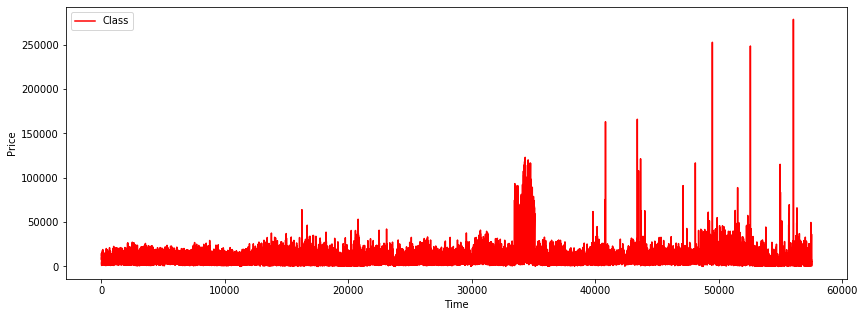

In [16]:
INICIO = 0
FIN = 57514
plt.figure(figsize=(14,5))
pyplot.plot(DATASET1['Volume'][INICIO:FIN], color = 'red', label = FEATURE_NAME)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
DATASET.loc[:5,['Close','Pct_Range_Close','Class','Sell','Sell2','Buy','Buy2']]

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [53]:
#Describe DATASET
print('Shape: ', DATASET[FEATURE_NAME].shape)
print(DATASET[FEATURE_NAME].describe())
print(DATASET[FEATURE_NAME].dtypes)


Shape:  (102514,)
count    102514.000000
mean          0.001951
std           1.299852
min          -2.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: Class, dtype: float64
float64


(102514, 25)


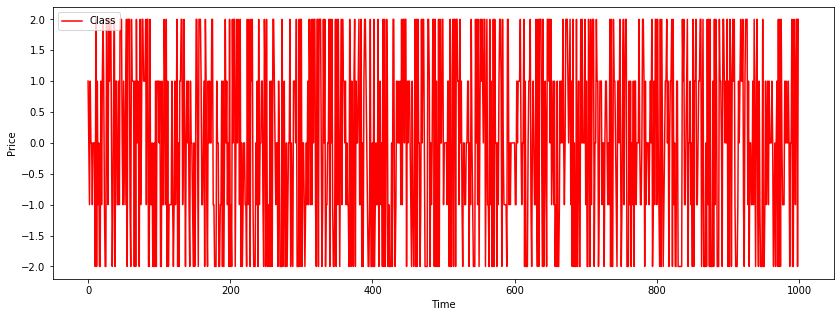

In [54]:
INICIO = 0
FIN = 1000
print(DATASET.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET[FEATURE_NAME][INICIO:FIN], color = 'red', label = FEATURE_NAME)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
INICIO = 0
FIN = 100
print(DATASET.shape)
DATASET[FEATURE_NAME][INICIO:FIN].plot_bokeh(
    kind="bar",
    ylabel=FEATURE_NAME,
    title=FEATURE_NAME,
    alpha=0.6)

(102514, 25)


Figure(id='1203', ...)

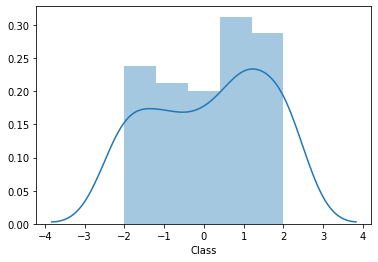

In [58]:
sns.distplot(DATASET[FEATURE_NAME][INICIO:FIN]);

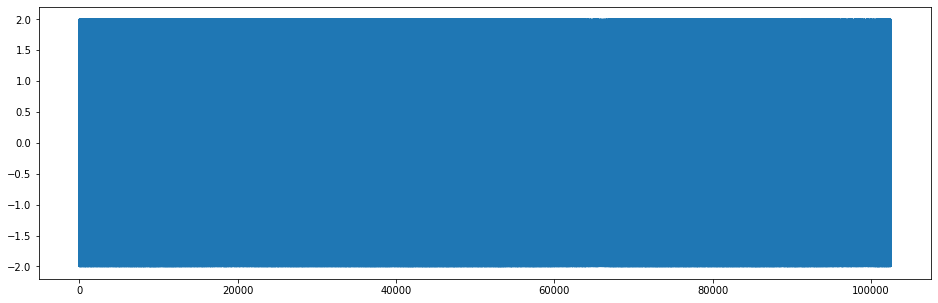

In [59]:
pyplot.figure(figsize=(16,5))
pyplot.plot(DATASET[FEATURE_NAME])

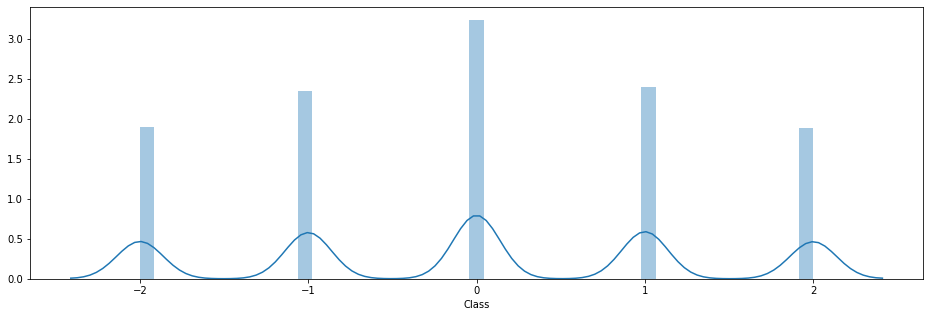

In [60]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET[FEATURE_NAME]);

In [67]:
start_sub = 0
end_sub = 1025
print(DATASET.shape)
data_daily_resampled = DATASET

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=data_daily_resampled.index[start_sub:end_sub], y=data_daily_resampled['Close'][start_sub:end_sub],
                    mode='lines',
                    name='Close'))
fig.add_trace(go.Scatter(x=data_daily_resampled.index[start_sub:end_sub], y=data_daily_resampled['Sell'][start_sub:end_sub],
                    mode='markers',
                    name='Sell'))
fig.add_trace(go.Scatter(x=data_daily_resampled.index[start_sub:end_sub], y=data_daily_resampled['Buy'][start_sub:end_sub],
                    mode='markers',
                    name='Buy'))
fig.add_trace(go.Scatter(x=data_daily_resampled.index[start_sub:end_sub], y=data_daily_resampled['Sell2'][start_sub:end_sub],
                    mode='markers',
                    name='Sell2'))
fig.add_trace(go.Scatter(x=data_daily_resampled.index[start_sub:end_sub], y=data_daily_resampled['Buy2'][start_sub:end_sub],
                    mode='markers',
                    name='Buy2'))

fig.show()

(102514, 25)
